# Insurance ML Predication Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
## Load the Datasets
df=pd.read_csv(r'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Apply EDA for Data Analysis

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
## Check & remove null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
## Check & remove duplicate
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Visulization

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

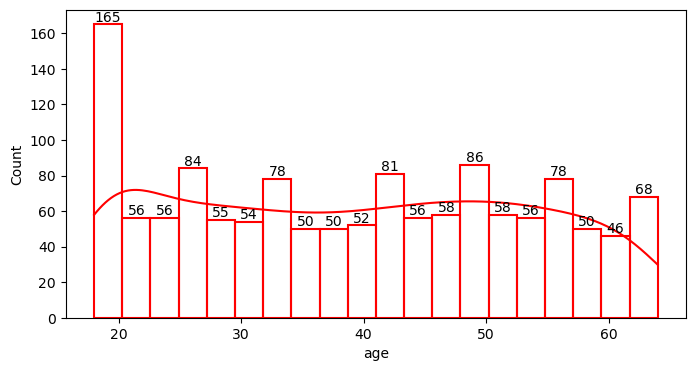

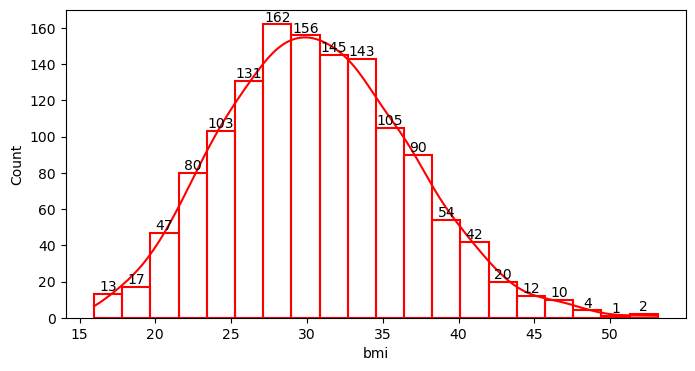

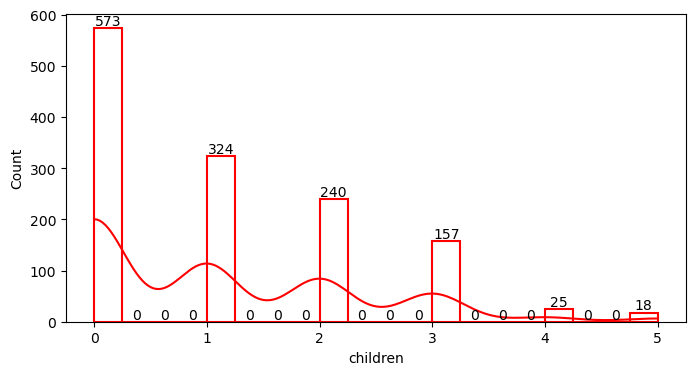

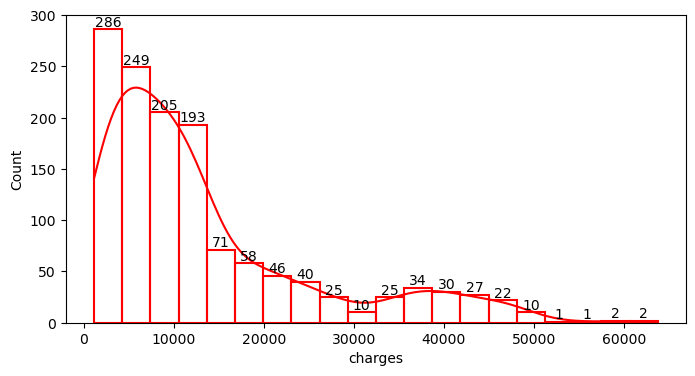

In [11]:
## Distribution of all Numerical features
numeric_cols= ['age','bmi', 'children', 'charges']
for i in numeric_cols:
    plt.figure(figsize=(8,4),dpi=100)
    ax=sns.histplot(df[i],kde=True,bins=20,fill=False,color='red')
    ax.bar_label(ax.containers[0])

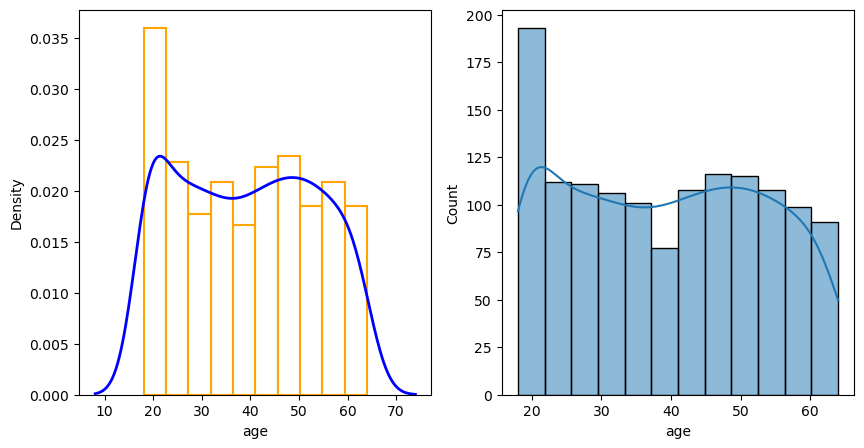

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='age', bins=10, stat='density',
             color='orange', fill=False)


sns.kdeplot(data=df['age'], color='blue', linewidth=2)


plt.subplot(1,2,2)
sns.histplot(x='age',data=df,kde=True)
plt.show()

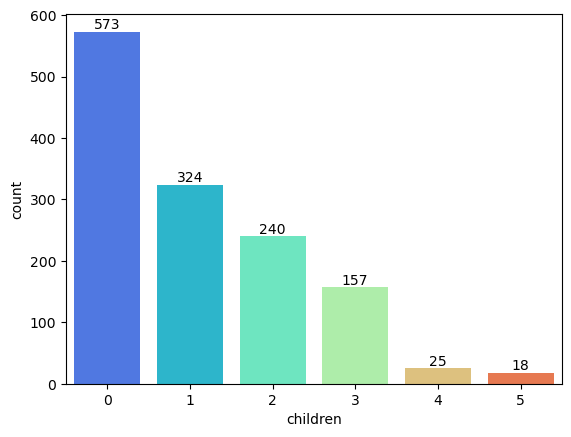

In [13]:
ax=sns.countplot(x=df['children'],palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
plt.show()

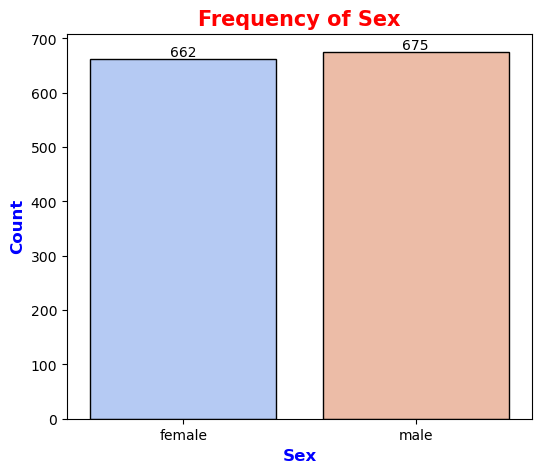

In [14]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='sex',data=df,palette='coolwarm',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Frequency of Sex',fontsize=15,color='red',weight='bold')
plt.xlabel('Sex',fontsize=12,color='blue',weight='bold')
plt.ylabel('Count',fontsize=12,color='blue',weight='bold')
plt.show()

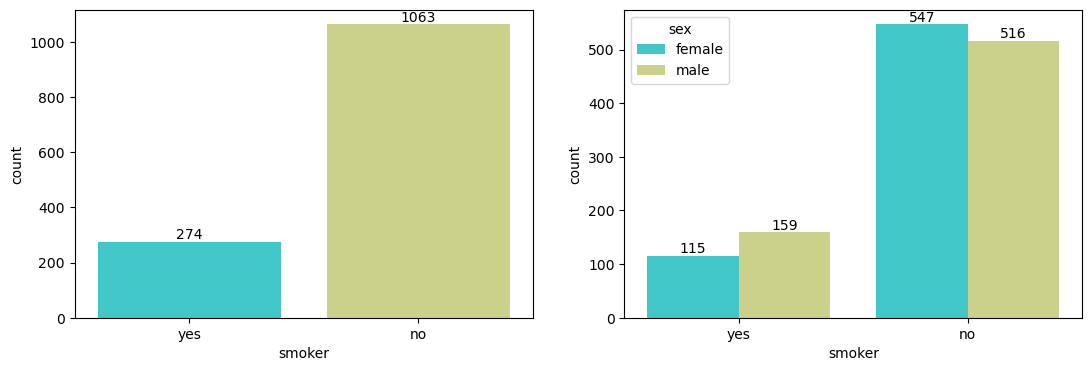

In [15]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
ax= sns.countplot(x=df['smoker'],palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,2,2)
ax= sns.countplot(x=df['smoker'],hue=df['sex'],palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

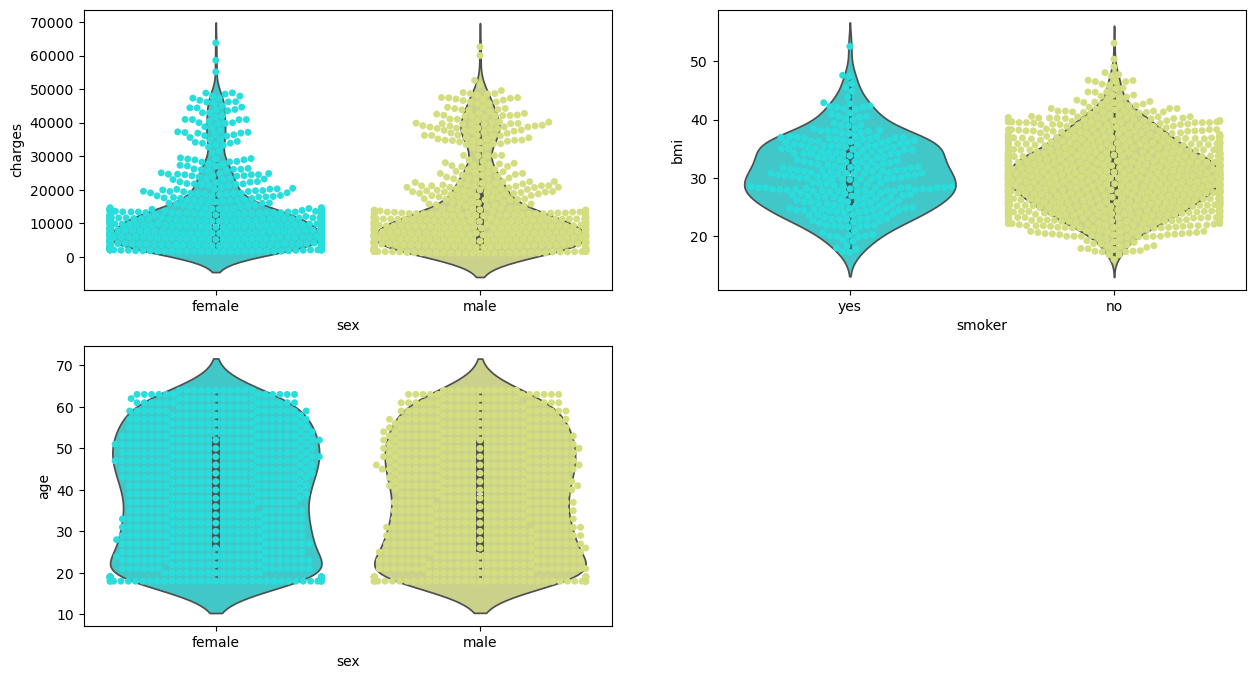

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(x='sex',y='charges',data=df,palette='rainbow')
sns.swarmplot(x='sex',y='charges',data=df,palette='rainbow')

plt.subplot(2,2,2)
sns.violinplot(x='smoker',y='bmi',data=df,palette='rainbow')
sns.swarmplot(x='smoker',y='bmi',data=df,palette='rainbow')

plt.subplot(2,2,3)
sns.violinplot(x='sex',y='age',data=df,palette='rainbow')
sns.swarmplot(x='sex',y='age',data=df,palette='rainbow')
plt.show()

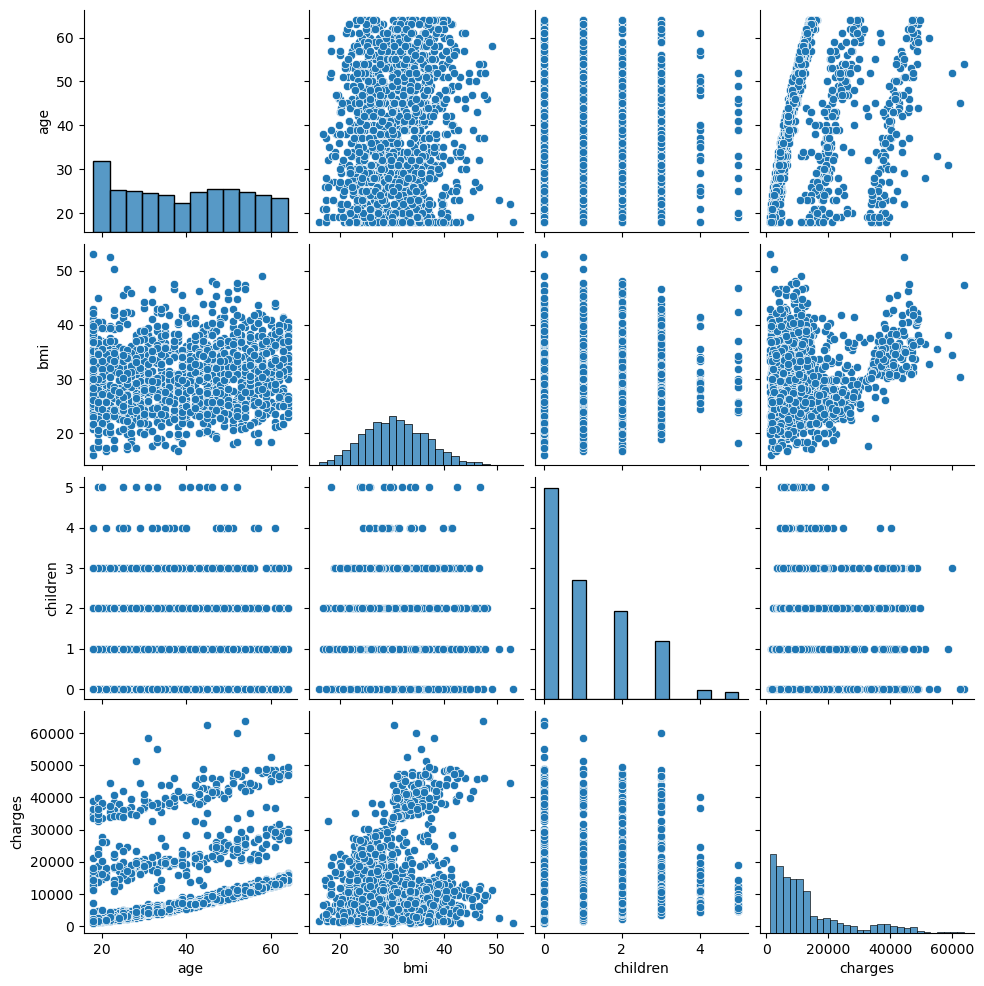

In [17]:
sns.pairplot(data=df)
plt.show()

## Play with the Outliers

In [18]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


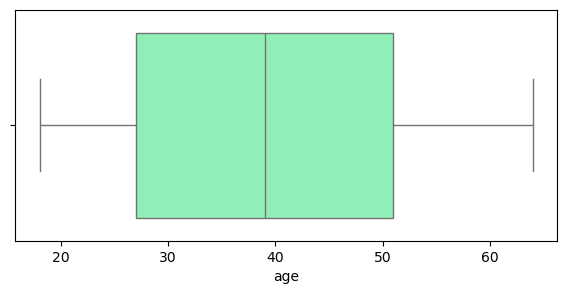

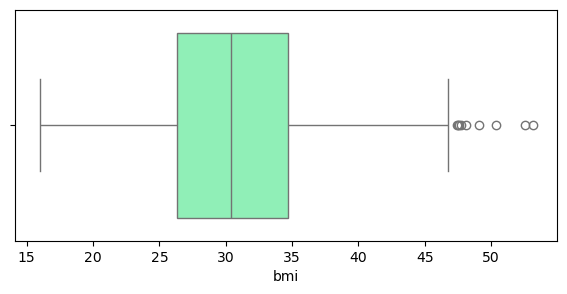

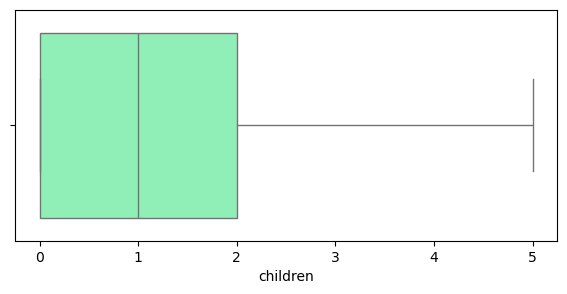

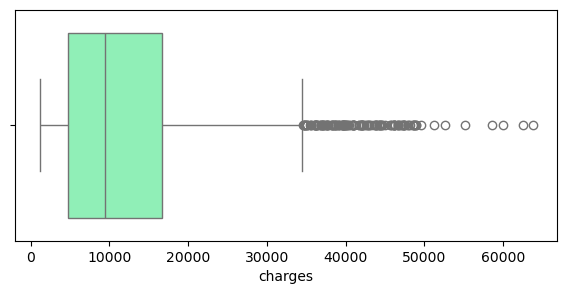

In [19]:
num_cols= df.select_dtypes(include='number').columns
for i in num_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[i],palette='rainbow')
    plt.show()

In [20]:
## We are apply capping technique on the outliers
outliers=['bmi','charges']
for col in outliers:
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lower_limit= q1 - 1.5 * iqr
    upper_limit= q3 + 1.5 * iqr
    ## Cap the outliers using np.where
    df[col] = np.where(
    df[col] > upper_limit, upper_limit,
    np.where(df[col] < lower_limit, lower_limit, df[col])
    )

In [21]:
df.shape

(1337, 7)

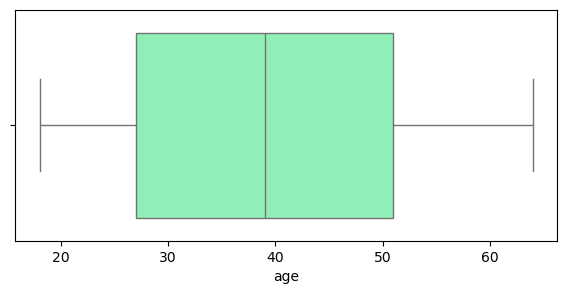

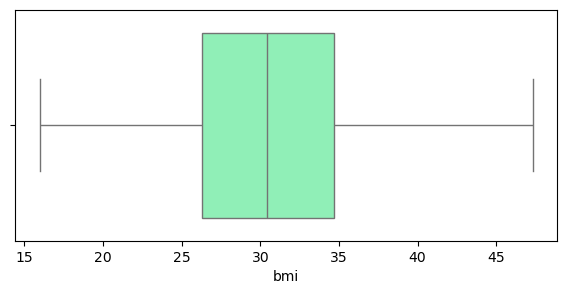

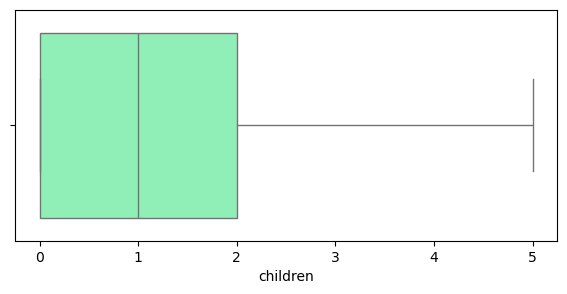

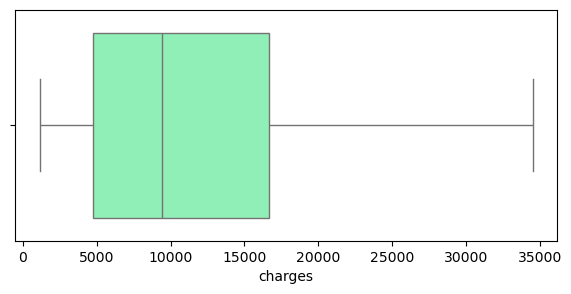

In [22]:
num_cols= df.select_dtypes(include='number').columns
for i in num_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[i],palette='rainbow')
    plt.show()

In [23]:
## Check Coloumns Datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Feature Engineering

In [24]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [25]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [26]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
## Feature Extraction
df['bmi_category']= pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,float('inf')],
 labels=['UnderWeight','Normal','OverWeight','Obese'])

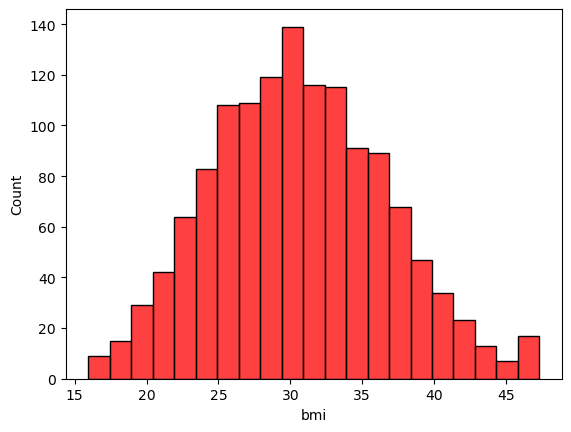

In [28]:
sns.histplot(data=df,x='bmi',color='red')
plt.show()

In [29]:
## Encoding `smoker` columns
df['smoker']=df['smoker'].map({
    'no':1,
    'yes':0
})

In [30]:
## Encoding `sex`, `region`, `bmi_category` columns
cat_cols = ['sex', 'region', 'bmi_category']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)
df_encoded.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_UnderWeight,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,19,27.900,0,0,16884.92400,True,False,False,False,False,True,False,False,True,False
1,18,33.770,1,1,1725.55230,False,True,False,False,True,False,False,False,False,True
2,28,33.000,3,1,4449.46200,False,True,False,False,True,False,False,False,False,True
3,33,22.705,0,1,21984.47061,False,True,False,True,False,False,False,True,False,False
4,32,28.880,0,1,3866.85520,False,True,False,True,False,False,False,False,True,False


In [31]:
df_encoded= df_encoded.astype(int)
df_encoded.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_UnderWeight,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,19,27,0,0,16884,1,0,0,0,0,1,0,0,1,0
1,18,33,1,1,1725,0,1,0,0,1,0,0,0,0,1
2,28,33,3,1,4449,0,1,0,0,1,0,0,0,0,1
3,33,22,0,1,21984,0,1,0,1,0,0,0,1,0,0
4,32,28,0,1,3866,0,1,0,1,0,0,0,0,1,0


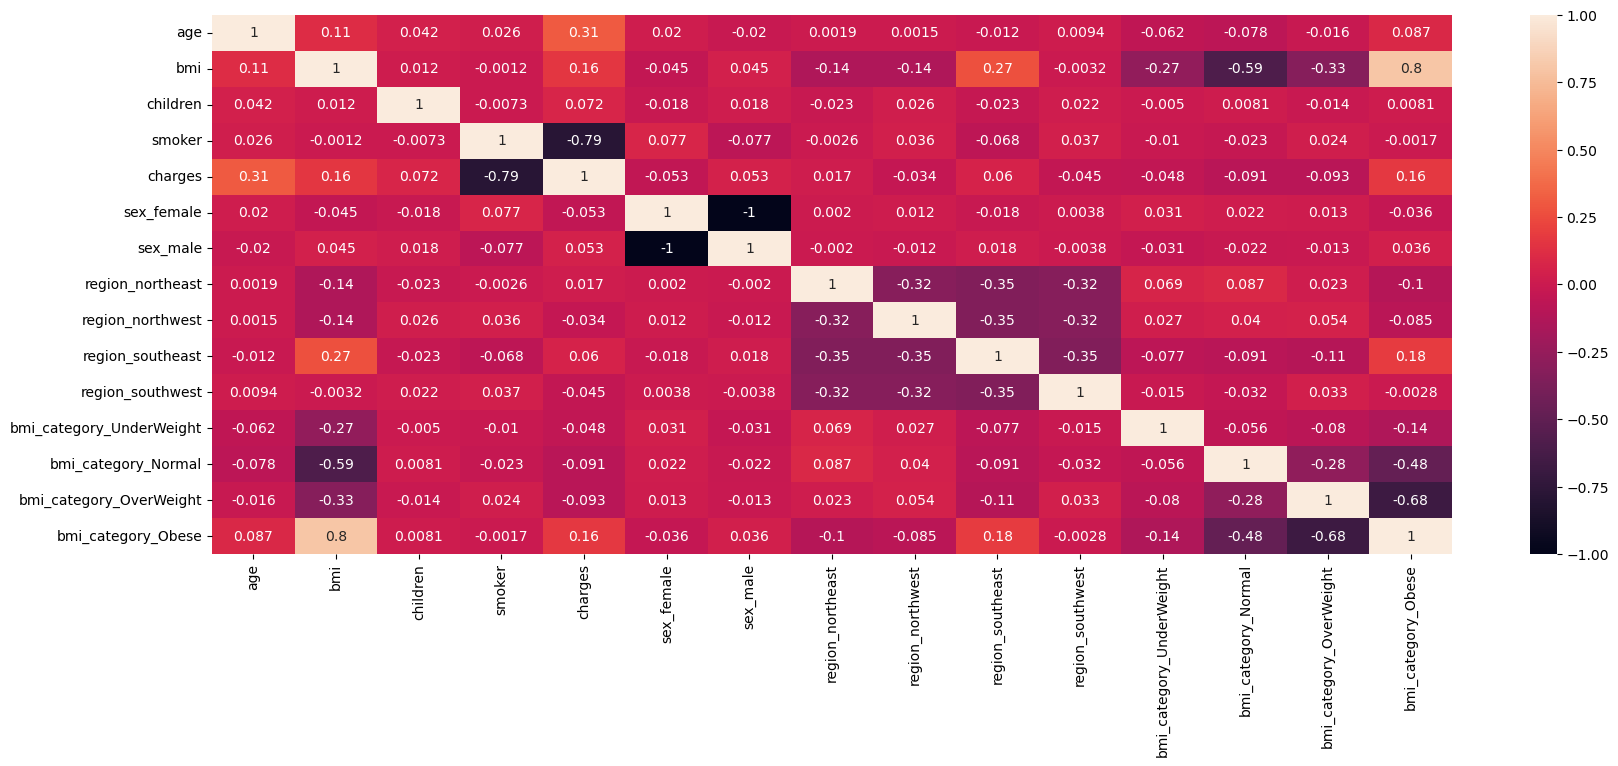

In [32]:
## Find Relation between input & output features
plt.figure(figsize=(20,7))
sns.heatmap(data=df_encoded.corr(),annot=True)
plt.show()

In [33]:
##  Split Data x= Input & y= Output
x= df_encoded.drop(['charges'],axis=1)
y= df_encoded['charges']

In [34]:
x.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_UnderWeight,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,19,27,0,0,1,0,0,0,0,1,0,0,1,0
1,18,33,1,1,0,1,0,0,1,0,0,0,0,1
2,28,33,3,1,0,1,0,0,1,0,0,0,0,1
3,33,22,0,1,0,1,0,1,0,0,0,1,0,0
4,32,28,0,1,0,1,0,1,0,0,0,0,1,0


In [35]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int32

In [36]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaling= StandardScaler()
scaling.fit(x)
new_df = pd.DataFrame(scaling.transform(x),columns=x.columns)
new_df.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_UnderWeight,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,-1.440418,-0.519239,-0.909234,-1.969660,1.009771,-1.009771,-0.565546,-0.565546,-0.611638,1.764609,-0.126323,-0.445004,1.586953,-1.072156
1,-1.511647,0.467574,-0.079442,0.507702,-0.990324,0.990324,-0.565546,-0.565546,1.634955,-0.566698,-0.126323,-0.445004,-0.630138,0.932700
2,-0.799350,0.467574,1.580143,0.507702,-0.990324,0.990324,-0.565546,-0.565546,1.634955,-0.566698,-0.126323,-0.445004,-0.630138,0.932700
3,-0.443201,-1.341583,-0.909234,0.507702,-0.990324,0.990324,-0.565546,1.768203,-0.611638,-0.566698,-0.126323,2.247170,-0.630138,-1.072156
4,-0.514431,-0.354770,-0.909234,0.507702,-0.990324,0.990324,-0.565546,1.768203,-0.611638,-0.566698,-0.126323,-0.445004,1.586953,-1.072156


# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(new_df,y,test_size=0.20,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1069, 14) (268, 14) (1069,) (268,)


# Build a Model

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),  # Fixed typo here too
    'SVR': SVR()
}

results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)*100
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Model': name,
        'R2 Score': round(r2, 3),
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3)
    })

In [40]:
results

[{'Model': 'Linear Regression',
  'R2 Score': 81.638,
  'MAE': 3252.751,
  'RMSE': 4632.12},
 {'Model': 'Lasso', 'R2 Score': 81.643, 'MAE': 3250.368, 'RMSE': 4631.419},
 {'Model': 'Ridge', 'R2 Score': 81.636, 'MAE': 3252.815, 'RMSE': 4632.412},
 {'Model': 'KNN', 'R2 Score': 77.287, 'MAE': 3029.225, 'RMSE': 5151.766},
 {'Model': 'Decision Tree',
  'R2 Score': 73.348,
  'MAE': 2347.448,
  'RMSE': 5580.598},
 {'Model': 'Random Forest',
  'R2 Score': 84.24,
  'MAE': 2276.953,
  'RMSE': 4291.326},
 {'Model': 'SVR', 'R2 Score': -11.805, 'MAE': 8062.342, 'RMSE': 11430.046}]

**Random Forest algorithm gives best Accuracy is 84.24 as compare other regression algorithm**

**then we use random forest algorithm**

####

## Build a model help of K-Fold cross validation

In [41]:
## use for Linear Regression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
cross_linear = cross_val_score(regression, new_df, y, cv=5, scoring='r2') 

print("Linear Regression Cross-validation R2 scores:", cross_linear)
print("Mean R2 score:", round(cross_linear.mean(),2)*100)

Linear Regression Cross-validation R2 scores: [0.75840966 0.68268016 0.79181665 0.73388466 0.76470003]
Mean R2 score: 75.0


In [42]:
## use for Decision Tree Regression
from sklearn.model_selection import cross_val_score
decision = DecisionTreeRegressor()
tree_regression = cross_val_score(decision, new_df, y, cv=5, scoring='r2') 

print("Decision tree Regression Cross-validation R2 scores:",tree_regression )
print("Mean R2 score:", round(tree_regression.mean(),2)*100)

Decision tree Regression Cross-validation R2 scores: [0.68905571 0.46780526 0.67097513 0.61291387 0.67822278]
Mean R2 score: 62.0


In [43]:
## use for Random Forest Regression
from sklearn.model_selection import cross_val_score
forest = RandomForestRegressor()
forest_regression = cross_val_score(forest, new_df, y, cv=10, scoring='r2') 

print("Random forest Regression Cross-validation R2 scores:",forest_regression )
print("Mean R2 score:", round(forest_regression.mean(),2)*100)

Random forest Regression Cross-validation R2 scores: [0.82784135 0.79342945 0.73546904 0.66999301 0.8195951  0.8706112
 0.80132821 0.72833524 0.81772638 0.84312541]
Mean R2 score: 79.0


In [44]:
## use for KNN
from sklearn.model_selection import cross_val_score
neighbours = KNeighborsRegressor()
neghbours_regression = cross_val_score(neighbours, new_df, y, cv=10, scoring='r2') 

print("KNN Regression Cross-validation R2 scores:",neghbours_regression)
print("Mean R2 score:", round(neghbours_regression.mean(),2)*100)

KNN Regression Cross-validation R2 scores: [0.81022349 0.69505328 0.69913456 0.61701514 0.78855212 0.83059728
 0.78940914 0.73992699 0.80456884 0.81370785]
Mean R2 score: 76.0


In [45]:
## use for Lasso
from sklearn.model_selection import cross_val_score
laso = Lasso()
laso_regression = cross_val_score(laso, new_df, y, cv=5, scoring='r2') 

print("Lasso Regression Cross-validation R2 scores:",laso_regression)
print("Mean R2 score:", round(laso_regression.mean(),2)*100)

Lasso Regression Cross-validation R2 scores: [0.7584189  0.68273228 0.79179584 0.73403556 0.76470756]
Mean R2 score: 75.0


In [48]:
## use for Ridge
from sklearn.model_selection import cross_val_score
ridge = Ridge()
ridge_regression = cross_val_score(ridge, new_df, y, cv=5, scoring='r2') 

print("Ridge Regression Cross-validation R2 scores:",ridge_regression)
print("Mean R2 score:", round(ridge_regression.mean(),2)*100)

Ridge Regression Cross-validation R2 scores: [0.75839193 0.68280342 0.7917228  0.73408898 0.76469203]
Mean R2 score: 75.0


## Conculsion
- **We deploy Random forest model becuse it`s gives best accuracy & accuracy is 84.67**